In [6]:
import os
import sys
import itertools
import math
import logging
import re
import random
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import albumentations as A


# Root directory of the project
ROOT_DIR = os.path.abspath(os.getcwd())

MONUSEG_DIR = os.path.join(ROOT_DIR, "datasets", "monuseg_dist")
# Import Mask RCNN 
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model as modellib
from mrcnn.model import log

import Monuseg_dist

%matplotlib inline 
# Comment out to reload imported modules if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load dataset - 
subset = "train"
dataset_dir = os.path.join(MONUSEG_DIR, subset)
image_dir = os.path.join(dataset_dir, "tissue_images")
image_ids = os.listdir(image_dir)
print("Found {} images in {}".format(len(image_ids), image_dir))


dataset_train = Monuseg_dist.MonusegDISTDataset("GT")
dataset_train.add_class(source = "Monuseg", class_id =  1, class_name = "nucleus")

# Fill with the samples
i = 0
for _id in image_ids:
    name,_ = os.path.splitext(_id)
    if i <= len(image_ids):
        dataset_train.add_image(source = "Monuseg",
                                image_id = name,
                                path = os.path.join(image_dir, _id))
    i+=1    
    
dataset_train.prepare()

print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Found 30 images in C:\Users\User\GitHub\Improved Mask R-CNN\datasets\monuseg_dist\train\tissue_images
Image Count: 30
Class Count: 2
  0. BG                                                
  1. nucleus                                           


In [3]:
# Load dataset - Add everything to train for simplicity with the next cells

dataset_val = Monuseg_dist.MonusegDISTDataset("UNET")
dataset_val.add_class(source = "Monuseg", class_id =  1, class_name = "nucleus")

subset = "val"
dataset_dir = os.path.join(MONUSEG_DIR, subset)
image_dir = os.path.join(dataset_dir, "tissue_images")
image_ids = os.listdir(image_dir)
print("Found {} images in {}".format(len(image_ids), image_dir))
# Fill with the samples
i = 0
for _id in image_ids:
    name,_ = os.path.splitext(_id)
    dataset_val.add_image(source = "Monuseg",
                          image_id = name,
                          path = os.path.join(image_dir,_id))
    i+=1    
    

dataset_val.prepare()

print("Image Count: {}".format(len(dataset_val.image_ids)))
print("Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Found 14 images in C:\Users\User\GitHub\Improved Mask R-CNN\datasets\monuseg_dist\val\tissue_images
Image Count: 14
Class Count: 2
  0. BG                                                
  1. nucleus                                           


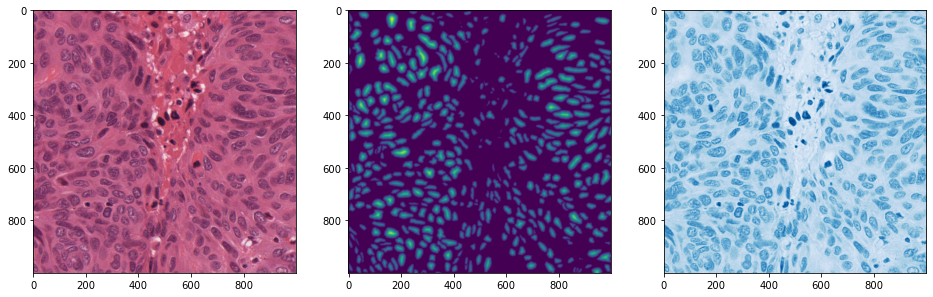

In [4]:
_id = 0
image = dataset_train.load_image(_id) 
fig, axs = plt.subplots(1,3, figsize = (16,16))

axs[0].imshow(image[:,:,0:3])
axs[1].imshow(image[:,:,3])
axs[2].imshow(image[:,:,4], cmap = "Blues")